Data Analysis - Regressions lab
Raven Delaney
12/17/2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
movies_df = pd.read_csv('./rotten_tomatoes_movies.csv')
movies_df.head(5)

,movie_title,rating,genre,directors,tomatometer_rating,audience_rating
0,Meteor,PG,"Action & Adventure, Drama, Mystery & Suspense,...",Ronald Neame,5,12
1,Approaching the Unknown,PG,"Drama, Mystery & Suspense, Science Fiction & F...",Mark Elijah Rosenberg,43,14
2,Adventures of a Teenage Dragonslayer,PG,"Action & Adventure, Comedy, Kids & Family, Sci...",Andrew Lauer,60,16
3,Deal of the Century,PG,Comedy,William Friedkin,11,17
4,Caddyshack II,PG,Comedy,Allan Arkush,4,18


In [3]:
numeric_only = movies_df.drop(["movie_title", "rating", "genre", "directors"], axis=1)
numeric_only

,tomatometer_rating,audience_rating
0,5,12
1,43,14
2,60,16
3,11,17
4,4,18
...,...,...
988,83,96
989,87,96
990,97,96
991,98,96


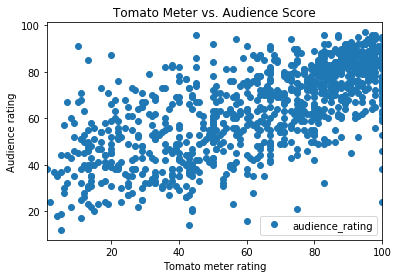

In [4]:
numeric_only.plot(x='tomatometer_rating', y='audience_rating', style='o')
plt.title('Tomato Meter vs. Audience Score')
plt.xlabel('Tomato meter rating')
plt.ylabel('Audience rating')
plt.show()

In [5]:
numeric_only.describe()

,tomatometer_rating,audience_rating
count,993.000000,993.000000
mean,64.118832,64.681772
std,27.665411,18.903443
min,1.000000,12.000000
25%,43.000000,50.000000
50%,70.000000,68.000000
75%,88.000000,81.000000
max,100.000000,97.000000


In [8]:
X = numeric_only.iloc[:, :-1].values
y = numeric_only.iloc[:, 1].values
X

array([[  5],
       [ 43],
       [ 60],
       [ 11],
       [  4],
       [  5],
       [ 15],
       [ 44],
       [ 44],
       [ 75],
       [  8],
       [ 14],
       [ 28],
       [ 13],
       [ 16],
       [ 19],
       [ 56],
       [  2],
       [ 18],
       [ 23],
       [100],
       [ 11],
       [ 29],
       [ 29],
       [ 12],
       [ 42],
       [ 42],
       [ 25],
       [ 25],
       [ 37],
       [ 43],
       [  6],
       [ 12],
       [ 26],
       [ 62],
       [ 40],
       [ 44],
       [  6],
       [ 13],
       [ 23],
       [ 29],
       [ 35],
       [ 13],
       [ 14],
       [ 20],
       [ 25],
       [ 35],
       [ 37],
       [ 39],
       [ 42],
       [ 53],
       [  7],
       [ 11],
       [ 17],
       [ 25],
       [ 30],
       [ 31],
       [ 33],
       [ 33],
       [ 53],
       [ 83],
       [ 14],
       [ 18],
       [ 33],
       [ 36],
       [ 38],
       [ 46],
       [ 32],
       [ 32],
       [ 53],
       [  4],
      

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regressor.intercept_)

33.88385373542958


In [12]:
print(regressor.coef_)

[0.48267015]


In [14]:
y_pred = regressor.predict(X_test)
new_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
new_df

,Actual,Predicted
0,84,75.393486
1,80,65.740083
2,28,36.779875
3,71,66.222753
4,92,79.254847
...,...,...
323,67,48.363958
324,33,51.259979
325,83,72.014795
326,32,39.193225


In [15]:
X_test

array([[ 86],
       [ 66],
       [  6],
       [ 67],
       [ 94],
       [ 84],
       [ 97],
       [ 70],
       [ 75],
       [ 90],
       [ 50],
       [ 73],
       [ 30],
       [ 55],
       [ 94],
       [ 87],
       [ 86],
       [ 75],
       [ 84],
       [ 16],
       [ 27],
       [ 25],
       [ 73],
       [ 25],
       [ 21],
       [ 45],
       [ 33],
       [ 32],
       [ 96],
       [ 67],
       [ 95],
       [ 98],
       [ 30],
       [ 28],
       [ 92],
       [ 71],
       [ 82],
       [100],
       [ 87],
       [ 22],
       [ 20],
       [ 85],
       [ 70],
       [ 57],
       [ 33],
       [ 93],
       [ 57],
       [ 61],
       [ 98],
       [ 40],
       [ 93],
       [ 83],
       [ 67],
       [ 95],
       [ 25],
       [ 33],
       [ 86],
       [ 84],
       [ 83],
       [ 66],
       [ 21],
       [ 76],
       [100],
       [ 11],
       [ 73],
       [ 84],
       [ 64],
       [ 13],
       [ 80],
       [ 43],
       [100],
      

In [16]:
y_test

array([84, 80, 28, 71, 92, 92, 87, 49, 79, 85, 63, 83, 38, 39, 62, 88, 90,
       63, 60, 23, 48, 27, 56, 31, 38, 82, 62, 61, 84, 70, 87, 56, 32, 52,
       76, 67, 71, 59, 95, 59, 87, 70, 55, 55, 35, 87, 70, 75, 78, 52, 79,
       64, 55, 92, 61, 68, 89, 88, 74, 74, 68, 59, 77, 51, 79, 50, 65, 50,
       60, 41, 66, 89, 75, 51, 60, 91, 67, 74, 78, 77, 58, 76, 57, 83, 70,
       74, 86, 88, 89, 80, 86, 33, 88, 53, 76, 79, 88, 51, 37, 50, 65, 46,
       62, 86, 41, 89, 83, 88, 72, 80, 32, 85, 78, 44, 73, 52, 67, 62, 60,
       82, 73, 87, 64, 92, 62, 72, 50, 82, 53, 83, 60, 21, 70, 83, 38, 81,
       54, 59, 47, 95, 66, 61, 32, 28, 47, 27, 87, 81, 50, 53, 62, 86, 75,
       77, 68, 78, 86, 90, 55, 56, 68, 54, 80, 83, 41, 87, 58, 73, 86, 55,
       67, 41, 81, 66, 56, 76, 52, 96, 79, 78, 83, 82, 55, 48, 19, 57, 77,
       79, 58, 76, 42, 54, 53, 72, 68, 51, 52, 63, 90, 69, 87, 38, 83, 30,
       76, 87, 49, 43, 42, 30, 75, 83, 63, 72, 64, 94, 94, 75, 24, 74, 69,
       70, 59, 71, 33, 35

Observations -

Ignoring some obvious outliers, the average is that Tomato meter and Audience ratings are fairly similar

Those that are not similar tend towards audience scores being higher

I'm not thrilled with the margin of difference on the actual/predicted table. I think that came from a data set that was much too large and I used some arbitrary methods of making it smaller. Probably not as accurate as it could have been.